In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

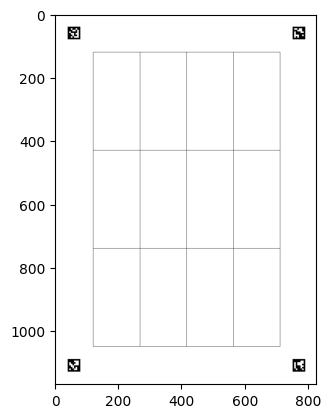

In [2]:
# image_loc="aruco_paper.png"
# image_loc='aruco.jpg'
# image_loc='aruco_ppr.png'
image_loc='media/new_aruco.png'
image=Image.open(image_loc)
image=np.array(image.convert('RGB'))
plt.imshow(image)

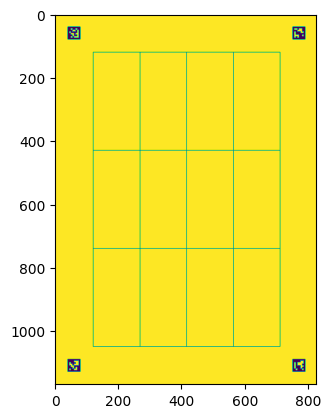

In [3]:
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

In [4]:
cv2.imshow("gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def detect_aruco_markers(gray: np.array):

    aruco_dict=cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50)
    det_params=cv2.aruco.DetectorParameters()
    detector=cv2.aruco.ArucoDetector(aruco_dict, det_params)

    corners, id, rejected = detector.detectMarkers(gray)
    # print(id)
    return corners, id, rejected


In [6]:
corners, id, rejected = detect_aruco_markers(gray)
print(np.shape(np.squeeze(corners)))
# cv2.circle(image, tuple(np.squeeze(corners[0])[0].astype(int)), 2, (255, 0, 0), 3)
# cv2.circle(image, tuple(np.squeeze(corners[1])[3].astype(int)), 2, (255, 0, 0), 3)
# cv2.circle(image, tuple(np.squeeze(corners[2])[0].astype(int)), 2, (255, 0, 0), 3)
# cv2.circle(image, tuple(np.squeeze(corners[3])[0].astype(int)), 2, (255, 0, 0), 3)

(4, 4, 2)


In [7]:
cv2.imshow("pic", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
corners=np.squeeze(corners)
marker_centers=np.zeros([4, 2], dtype=np.float32)
for i in range(np.shape(corners)[0]): #loop for each marker (usually 4)
    marker_centers[i]=corners[i].mean(axis=0)
print(marker_centers)
print(np.shape(image))

[[ 769.5 1109.5]
 [  59.5 1109.5]
 [ 769.5   59.5]
 [  59.5   59.5]]
(1169, 827, 3)


In [17]:
warped_points=np.array([[1169,827], [0, 827], [1169, 0], [0,0]], np.float32)
transform=cv2.getPerspectiveTransform(marker_centers, warped_points)
warped_img=cv2.warpPerspective(image, transform, (1169, 827))

In [ ]:
cv2.namedWindow("warp", cv2.WINDOW_NORMAL)
cv2.imshow("warp", warped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()